In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
sys.path.append(str(project_root/"src"))


In [ ]:
from helpers.api_calls import (
    query_da_price,
    query_da_borders,
    query_intraday_wap,
    query_wind_forecast,
    query_solar_forecast,
    query_demand_anticipated,
    query_demand_forecast_error,
    query_da_demand_forecast,
    query_generation_vs_forecast,
)

In [3]:
from datetime import datetime

start_date = datetime(2025, 12, 10)
end_date = datetime(2025, 12, 15)

for query_func in [
    query_da_price,
    query_da_borders,
    query_intraday_wap,
    query_wind_forecast,
    query_solar_forecast,
    query_demand_anticipated,
    query_demand_forecast_error,
    query_da_demand_forecast,
    query_generation_vs_forecast,
]:
    df = query_func(start=start_date, end=end_date)
    print(f"--- {query_func.__name__} ---")
    print(df.head())
    print()

--- query_da_price ---
                           DA HR Price (EPEX)  DA HR Price (Nordpool)  \
dateTime                                                                
2025-12-10 00:00:00+00:00               33.96                   34.89   
2025-12-10 01:00:00+00:00               29.61                   30.60   
2025-12-10 02:00:00+00:00               25.00                   27.07   
2025-12-10 03:00:00+00:00               22.08                   24.04   
2025-12-10 04:00:00+00:00               22.88                   23.80   

                           DA Weighted Price (EPEX Nordpool)  DA HH Price  \
dateTime                                                                    
2025-12-10 00:00:00+00:00                              34.62        32.35   
2025-12-10 01:00:00+00:00                              30.31        25.15   
2025-12-10 02:00:00+00:00                              26.50        21.68   
2025-12-10 03:00:00+00:00                              23.49        21.85   
202

In [4]:
# read in 2025 parquets
import os
import pandas as pd

data_path = "C:\\Users\\tamas\\Documents\\GitHub\\Project\\data\\raw\\2016\\"
for files in os.listdir(data_path):
    df_2016 = pd.read_parquet(data_path + files)
    print(df_2016.head())

                           da_price  da_price_epex  da_price_nordpool  \
dateTime                                                                
2016-01-01 00:00:00+00:00     42.31          42.31              42.31   
2016-01-01 01:00:00+00:00     51.14          51.13              51.13   
2016-01-01 02:00:00+00:00     49.71          49.70              49.70   
2016-01-01 03:00:00+00:00     40.69          40.69              40.69   
2016-01-01 04:00:00+00:00     38.04          38.04              38.04   

                           da_price_hh  da_volume_epex  da_volume_nordpool  \
dateTime                                                                     
2016-01-01 00:00:00+00:00        44.39          6342.2                 NaN   
2016-01-01 01:00:00+00:00        52.79          6109.5                 NaN   
2016-01-01 02:00:00+00:00        51.06          5927.6                 NaN   
2016-01-01 03:00:00+00:00        42.05          5991.1                 NaN   
2016-01-01 04:00:00+

In [5]:
# merge processed data files
import pandas as pd
data_path = "C:\\Users\\tamas\\Documents\\GitHub\\Project\\data\\processed\\"
dfs = []
for file in os.listdir(data_path):
    df_processed = pd.read_parquet(data_path + file)
    dfs.append(df_processed)
merged_df = pd.concat(dfs, ignore_index=True)
print(merged_df.head())

   da_price  da_price_epex  da_price_nordpool  da_price_hh  da_volume_epex  \
0     50.88          50.85              50.86          0.0          2030.0   
1     47.77          47.74              47.74          0.0          2069.7   
2     41.63          41.60              41.60          0.0          2060.5   
3     37.62          37.61              37.61          0.0          2189.8   
4     34.99          34.98              34.98          0.0          2205.9   

   da_volume_nordpool  da_volume_hh  intraday_wap  intraday_open  \
0                 NaN           NaN         47.73          52.01   
1                 NaN           NaN         41.89          49.43   
2                 NaN           NaN         36.33          40.44   
3                 NaN           NaN         36.31          34.67   
4                 NaN           NaN         34.61          34.67   

   intraday_close  ...  intraday_wap_rollmean_12  intraday_wap_rollstd_12  \
0           47.51  ...                       

In [6]:
print(merged_df.info())
print(merged_df.columns)
print(merged_df.dtypes)
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95506 entries, 0 to 95505
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   da_price                     95506 non-null  float64
 1   da_price_epex                95506 non-null  float64
 2   da_price_nordpool            95506 non-null  float64
 3   da_price_hh                  95486 non-null  float64
 4   da_volume_epex               95506 non-null  float64
 5   da_volume_nordpool           79520 non-null  float64
 6   da_volume_hh                 94673 non-null  float64
 7   intraday_wap                 95506 non-null  float64
 8   intraday_open                95506 non-null  float64
 9   intraday_close               95506 non-null  float64
 10  intraday_high                95506 non-null  float64
 11  intraday_low                 95506 non-null  float64
 12  ssp                          95506 non-null  float64
 13  sbp             

,da_price,da_price_epex,da_price_nordpool,da_price_hh,da_volume_epex,da_volume_nordpool,da_volume_hh,intraday_wap,intraday_open,intraday_close,...,intraday_wap_rollmean_12,intraday_wap_rollstd_12,intraday_wap_rollmean_24,intraday_wap_rollstd_24,da_price_rollmean_4,da_price_rollstd_4,da_price_rollmean_12,da_price_rollstd_12,da_price_rollmean_24,da_price_rollstd_24
count,95506.000000,95506.000000,95506.000000,95486.000000,95506.000000,79520.000000,94673.000000,95506.000000,95506.000000,95506.000000,...,95385.000000,95385.000000,95253.000000,95253.000000,95473.000000,95473.000000,95385.000000,95385.000000,95253.000000,95253.000000
mean,89.031692,89.074149,88.999491,88.292823,4945.621571,11840.844997,792.588974,86.793364,87.126218,86.757483,...,86.834857,20.359937,86.860386,23.662692,89.042481,11.228635,89.067439,19.323851,89.088201,22.307006
std,81.762427,81.957746,81.960844,80.647281,1318.122272,2841.883360,410.319277,81.490152,81.207549,86.479693,...,73.544694,30.568127,71.100511,33.221921,78.575875,23.603626,74.425551,29.688681,72.665262,31.283361
min,-59.970000,-88.220000,-63.200000,-100.570000,0.000000,3329.200000,0.000000,-120.130000,-92.490000,-161.840000,...,-70.790833,0.872164,-23.485417,2.217399,-44.192500,0.000000,-26.226667,0.853135,-11.853333,3.576077
25%,46.580000,46.620000,46.540000,45.860000,4015.600000,9930.800000,503.500000,45.230000,45.210000,44.260000,...,47.067500,8.752426,47.735417,10.702314,47.450000,3.733640,48.609167,8.885869,49.092083,10.734099
50%,64.535000,64.510000,64.430000,64.295000,4851.300000,11821.850000,747.100000,62.490000,62.510000,62.510000,...,62.081667,13.565364,61.898750,15.503636,64.685000,6.955043,63.369167,12.786871,62.981250,14.057380
75%,101.090000,100.897500,101.250000,101.520000,5791.800000,13802.400000,1025.900000,101.130000,100.230000,102.670000,...,100.060833,22.629253,99.203333,26.279572,100.537500,12.488270,99.240000,19.717201,98.623750,22.255173
max,2569.580000,3010.650000,2925.010000,2632.500000,11112.500000,23171.000000,4859.200000,3859.630000,4041.670000,4702.870000,...,1626.975833,1201.864641,919.966250,963.174613,1738.005000,1130.394570,1004.721667,837.101828,698.542083,640.545241


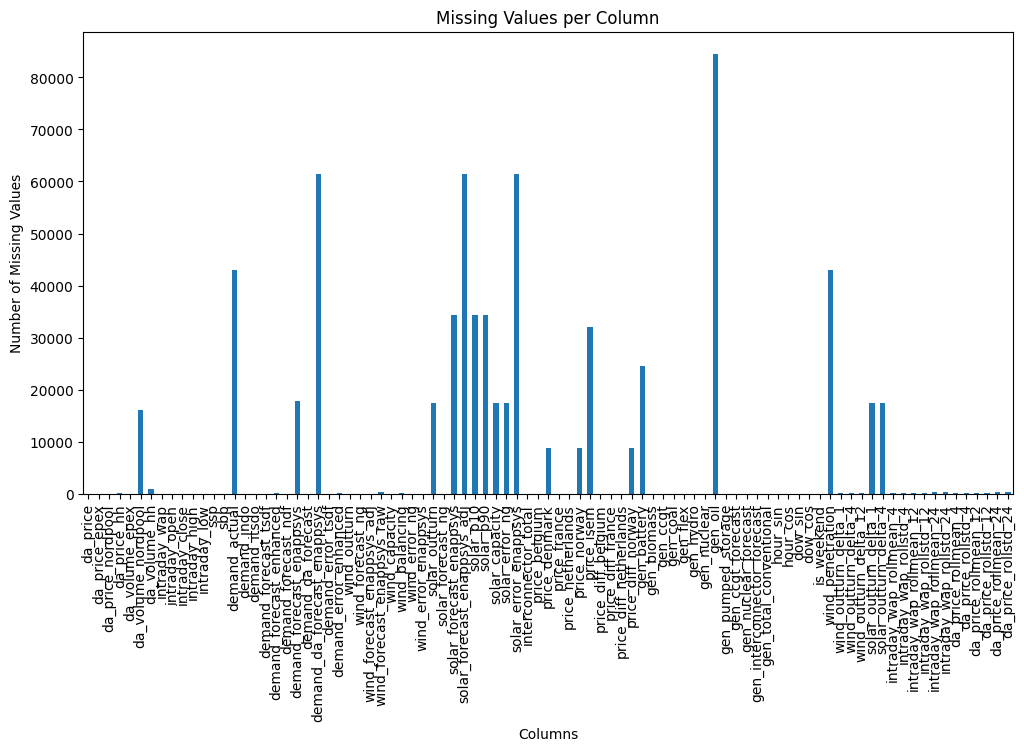

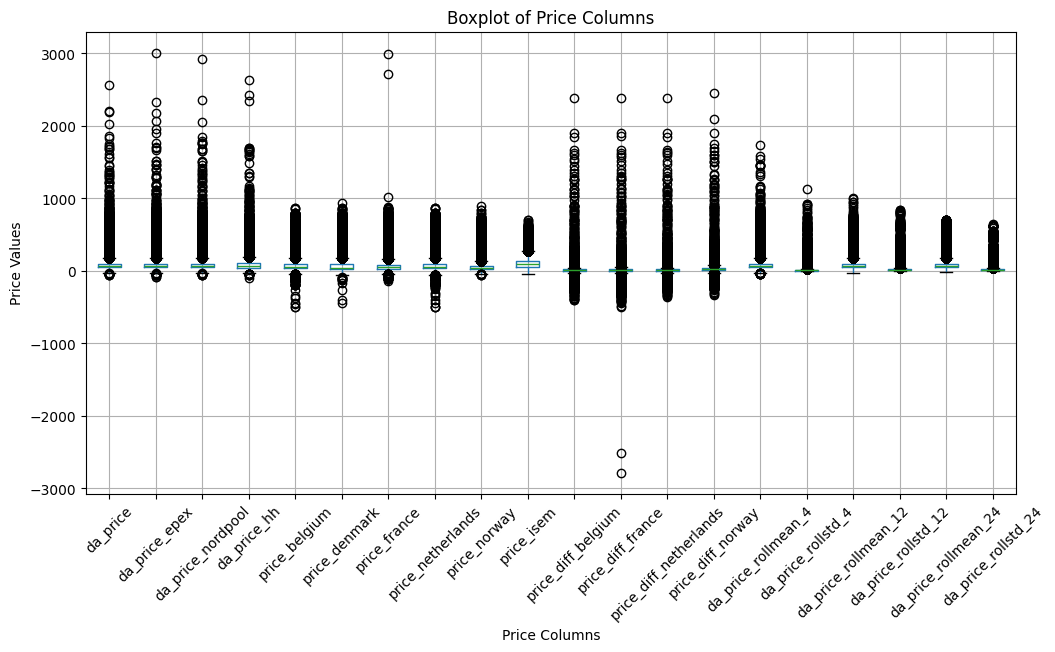

In [8]:
import matplotlib.pyplot as plt

#plot missing values
missing_values = merged_df.isnull().sum()
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#plot boxplot of price columns
price_columns = [col for col in merged_df.columns if 'price' in col.lower()]
plt.figure(figsize=(12, 6))
merged_df[price_columns].boxplot()
plt.title('Boxplot of Price Columns')
plt.xlabel('Price Columns')
# rotate x labels for better readability
plt.xticks(rotation=45)
plt.ylabel('Price Values')
plt.show()